# Plot monthly temperature variations
- This script is used to plot monthly temperature variations from simulations;
- Simulations: CNTL, TRAF at FR-Capitole. 

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cftime
import string
import matplotlib.dates as mdates
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
df_monthly = pd.read_csv('./data_for_figure/monthly_mean.csv')
df_monthly_5 = pd.read_csv('./data_for_figure/monthly_5.csv')
df_monthly_95 = pd.read_csv('./data_for_figure/monthly_95.csv')
df_monthly.head()

,month,TSA_U_cntl,TBUILD_cntl,TG_U_cntl,TSA_U_traffic,TBUILD_traffic,TG_U_traffic,outdoor_indoor_cntl,outdoor_indoor_traffic,TGMNAV_U_cntl,...,TREFMXAV_U_cntl,TREFMNAV_U_cntl,TGMNAV_U_traffic,TGMXAV_U_traffic,TREFMXAV_U_traffic,TREFMNAV_U_traffic,TG_daynight_cntl,TG_daynight_traffic,TSA_daynight_cntl,TSA_daynight_traffic
0,1,5.811174,11.950035,5.678090,6.378427,11.951697,6.430495,-6.138860,-5.573270,1.933324,...,9.294834,3.100197,2.655987,12.264533,9.713933,3.653710,9.563792,9.608546,6.194637,6.060223
1,2,5.236280,11.950012,5.688600,5.634785,11.950636,6.294222,-6.713733,-6.315851,1.497296,...,9.507830,2.918279,2.045319,14.295203,9.835820,3.386805,12.159526,12.249885,6.589550,6.449015
2,3,10.039447,13.134769,11.738712,10.392680,13.313963,12.308396,-3.095322,-2.921282,4.567094,...,15.230643,5.842275,5.038572,24.856493,15.529846,6.221642,19.667355,19.817920,9.388368,9.308204
3,4,12.886469,14.445519,14.985774,13.193615,14.761338,15.511022,-1.559050,-1.567724,7.432055,...,17.778590,8.662198,7.865685,27.637142,18.037601,8.969970,19.626917,19.771458,9.116392,9.067631
4,5,17.541105,19.132153,21.127003,17.817484,19.481813,21.644049,-1.591049,-1.664330,10.976097,...,23.606508,12.208489,11.359016,37.388890,23.848543,12.446651,25.832657,26.029871,11.398019,11.401893


In [14]:
col = 3
row = 3
var_list = ['TGMXAV_U',   'TGMNAV_U',    'TG_daynight',
            'TREFMXAV_U', 'TREFMNAV_U', 'TSA_daynight', 
            'TSA_U',       'TBUILD',     'outdoor_indoor']
title_list = [
    r'Daytime maximum $T_{\mathrm{grd}}$', 
    r'Daily minimum $T_{\mathrm{grd}}$', 
    r'Maximum-Minimum $\Delta T_{\mathrm{grd}}$',
    r'Daily maximum $T_{\mathrm{air}}$', 
    r'Daily minimum $T_{\mathrm{air}}$', 
    r'Maximum-Minimum $\Delta T_{\mathrm{air}}$',
    r'Daily mean $T_{\mathrm{air}}$', 
    r'Daily mean $T_{b}$', 
    r'Canopy-Indoor $\Delta T$'
]
case_list = ['cntl', 'traffic']
lc1 = '#d95f02'
lc2 = '#7570b3'
lc = [lc1, lc2]
labelfont = 6
linewidth = 0.5
labelcolor = '#6b6b6b'
label_list = ['CNTL', 'TRAF']
xwidth = 0.5
pad = 1
length = 2
padding = 4
ax_ymax_list = [48, 48, 32,
                32, 32, 16, 
                32, 28, 0]
ax_ymin_list = [0,  0,  0,  
                0,  0,  0,   
                0,  12, -12]
ax2_ymax_list = [1,    1,  0.3, 
                 0.8, 0.8, 0.4, 
                 0.8, 0.8, 0.6]
ax2_ymin_list = [0.2, 0.2, -0.1, 
                 0,     0, -0.4,  
                 0,     0, -0.2]
handletextpad = 0.5
marker = 'o'
markersize = 1
alpha=0.25

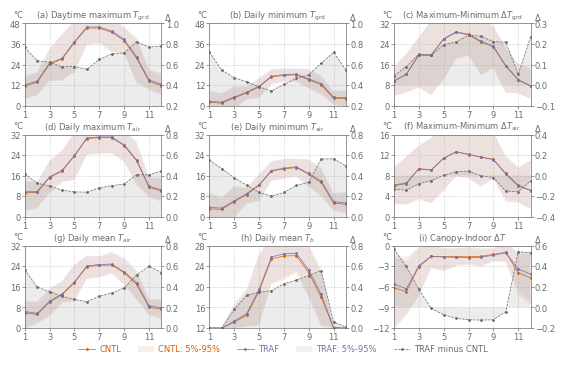

In [15]:
fig, axes = plt.subplots(row, col, figsize=(5.5, 3.5))
ax = axes.flatten()
for i in range(col*row):
    var = var_list[i]
    ax2 = ax[i].twinx()
    ax_ymax = ax_ymax_list[i]
    ax_ymin = ax_ymin_list[i]
    ax2_ymax = ax2_ymax_list[i]
    ax2_ymin = ax2_ymin_list[i]
    ax[i].set_ylim([ax_ymin, ax_ymax])
    ax2.set_ylim([ax2_ymin, ax2_ymax])
    ax[i].set_yticks([ax_ymin, ax_ymin + (ax_ymax - ax_ymin)/4, (ax_ymin + ax_ymax)/2, ax_ymax - (ax_ymax - ax_ymin)/4, ax_ymax])
    ax2.set_yticks([ax2_ymin, ax2_ymin + (ax2_ymax - ax2_ymin)/4, (ax2_ymin + ax2_ymax)/2, ax2_ymax - (ax2_ymax - ax2_ymin)/4, ax2_ymax])
    for c, case in enumerate(case_list):
        df_var_case = df_monthly[f'{var}_{case}']
        ax[i].plot(df_monthly['month'], df_var_case, color=lc[c], linewidth=linewidth, label=label_list[c], marker = marker, markersize=markersize)
        ax[i].fill_between(df_monthly['month'], df_monthly_5[f'{var}_{case}'], df_monthly_95[f'{var}_{case}'],alpha=0.1, color=lc[c],  edgecolor='none', label=label_list[c] + ': 5%-95%')
    delta = df_monthly[f'{var}_traffic'].values - df_monthly[f'{var}_cntl'].values
    ax2.plot(df_monthly['month'], delta, color=labelcolor, linestyle='--', linewidth=linewidth, label='TRAF minus CNTL', marker = marker, markersize=markersize) 
    ax2.fill_between(df_monthly['month'], delta, 0, color=labelcolor, alpha=alpha/2, edgecolor='none')
    for spine in ax[i].spines.values():
        spine.set_linewidth(xwidth)
        spine.set_edgecolor(labelcolor) 
    for spin in ax2.spines.values():
        spin.set_visible(False)    
    ax[i].set_xlim([1, 12])   
    ax[i].set_xticks(np.arange(1, 13, 2))
    ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor, 
                      color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, 
                      color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax2.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelcolor=labelcolor, 
                      color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)  
    ax2.tick_params(axis='x', which='both', top=False, bottom=False, labelbottom=False)   
    ax[i].set_title(f'({string.ascii_lowercase[i]}) {title_list[i]}',fontsize=labelfont,color=labelcolor, pad = padding) 
    ax[i].grid(True,linestyle='--',linewidth=0.5, alpha=0.5)
    ax[i].set_ylabel('°C' ,labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    ax[i].yaxis.set_label_coords(-0.05, 1.05)
    ax2.set_ylabel(r'$\Delta$' ,labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    ax2.yaxis.set_label_coords(1.05, 1.15)
lines1, labels1 = ax[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.015), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=labelfont, ncol=8)
for i, text in enumerate(legend.get_texts()):
    text.set_color([lc1, lc1, lc2, lc2, labelcolor][i])    
plt.subplots_adjust(left=0.03, right=0.95, bottom=0.08, top=0.95, wspace=0.35, hspace= 0.35)
fig.savefig('FR-Capitole_temperature_gradient.png', dpi=300)        
fig.savefig('FR-Capitole_temperature_gradient.pdf', dpi=600)   

# Description

In [7]:
df_monthly['TGMXAV_U_traffic']

0     12.264533
1     14.295203
2     24.856493
3     27.637142
4     37.388890
5     45.888410
6     45.947160
7     43.521650
8     38.719994
9     28.511738
10    15.086111
11    12.390919
Name: TGMXAV_U_traffic, dtype: float64